# 第7章 集成学习和随机森林

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.ensemble import VotingClassifier

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.svm import SVC

In [57]:
log_clf = LogisticRegression()

In [58]:
rnd_clf = RandomForestClassifier()

In [59]:
svm_clf = SVC()

In [60]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ],
    voting='hard'
)

- 软投票

In [61]:
svm_clf2 = SVC(probability=True)

In [62]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf2)
    ],
    voting='soft'
)

- 看看每个分类器在测试集上的准确率

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.datasets import make_moons

In [65]:
X, y = make_moons(n_samples=10000, noise=0.4)

In [66]:
X[:5]

array([[ 1.23547668,  0.60407074],
       [ 1.47429787,  0.52113555],
       [ 0.70226226,  0.95958105],
       [ 0.38895436,  0.66813267],
       [-0.70853998,  0.56959111]])

In [67]:
y[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
X_train.shape

(8000, 2)

In [71]:
X_test.shape

(2000, 2)

In [72]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

d:\python3.5.3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python3.5.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python3.5.3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression 0.8345
RandomForestClassifier 0.8455
SVC 0.87


d:\python3.5.3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python3.5.3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.869


In [73]:
voting_clf.predict_proba(X_test)

array([[0.94512921, 0.05487079],
       [0.58792462, 0.41207538],
       [0.46925721, 0.53074279],
       ...,
       [0.21561279, 0.78438721],
       [0.32095488, 0.67904512],
       [0.85243636, 0.14756364]])

## bagging和pasting

In [74]:
from sklearn.ensemble import BaggingClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1
)

In [77]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [78]:
y_pred = bag_clf.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.87

## 包外评估

In [80]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True
)

In [81]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [82]:
bag_clf.oob_score_

0.840125

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
y_pred = bag_clf.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.85

In [86]:
bag_clf.oob_decision_function_

array([[0.91351351, 0.08648649],
       [1.        , 0.        ],
       [0.03061224, 0.96938776],
       ...,
       [0.05113636, 0.94886364],
       [1.        , 0.        ],
       [0.21390374, 0.78609626]])

## 随机森林

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [89]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [90]:
y_pred_rf = rnd_clf.predict(X_test)

In [91]:
y_pred_rf

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [92]:
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

In [93]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='random'),
    

In [94]:
from sklearn.ensemble import ExtraTreesClassifier

In [95]:
clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [96]:
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=16,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [97]:
y_pred = clf.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.8605

In [99]:
from sklearn.datasets import load_iris

In [100]:
iris = load_iris()

In [101]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [102]:
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [103]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09066556522427048
sepal width (cm) 0.022629070036558684
petal length (cm) 0.42931506219841176
petal width (cm) 0.457390302540759


In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

In [106]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
pred = ada_clf.predict(X_test)

In [109]:
accuracy_score(pred, y_test)

0.859

## GBDT

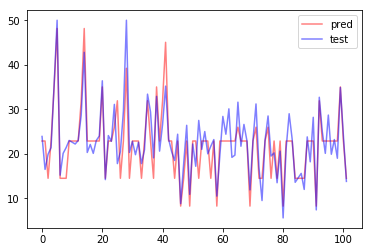

In [149]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 建立数据
boston = load_boston()
X = boston["data"]
y = boston["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 首先，在训练集上拟合一个DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train, y_train)

# 现在，针对第一个预测器的残差，训练第二个DecisionTreeRegressor
y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, y2)

# 然后针对第二个预测器的残差，训练第三个回归器
y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, y3)

# 现在，我们有了一个包含3棵树的集成。它将所有树的预测相加，从而对新实例进行预测。
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

plt.plot(list(range(len(y_pred))), y_pred, 'r', label="pred", alpha=0.5)
plt.plot(list(range(len(y_pred))), y_test, 'b', label="test", alpha=0.5)
plt.legend()

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
# 以下代码训练了一个拥有120棵树的GBRT集成，然后测量每个训练阶段的验证误差，从而找到树的最优数量，最后使用最优树数重新训练了一个GBRT集成。

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=81,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [164]:
bst_n_estimators

81

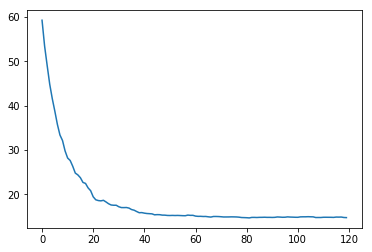

In [165]:
plt.plot(errors)

In [166]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            # 早期停止
            break
            
print(val_error)
print(n_estimators)

In [167]:
val_error

14.89373532722936

In [168]:
n_estimators

72